In [1]:
# --- Import packages ---0
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# --- Read Data ---

# Define the file paths
reeds_inputs_path = 'C:\\Users\\sshi\\Documents\\GitHub\\ReEDS-2.0\\inputs'
folder = 'plant_characteristics'
fc_paths = [os.path.join(reeds_inputs_path, folder, 'fuel-cell_high.csv'),
            os.path.join(reeds_inputs_path, folder, 'fuel-cell_mid.csv'),
            os.path.join(reeds_inputs_path, folder, 'fuel-cell_low.csv')]
h2ct_path = os.path.join(reeds_inputs_path, folder, 'h2-ct_ATB_2023.csv')     

# Read fuel cell data from each file into separate DataFrames
fc_dfs = [pd.read_csv(file_path) for file_path in fc_paths]
fc_dfs = [df.loc[df.t >=2020] for df in fc_dfs] # filter year

# Read H2-CT data from each file into separate DataFrames
h2ct_df = pd.read_csv(h2ct_path) 
h2ct_df = h2ct_df[(h2ct_df['t'] >= 2020) &                               # filter years
                    (h2ct_df['i'].isin(['H2-CT']))]                  # filter scenario

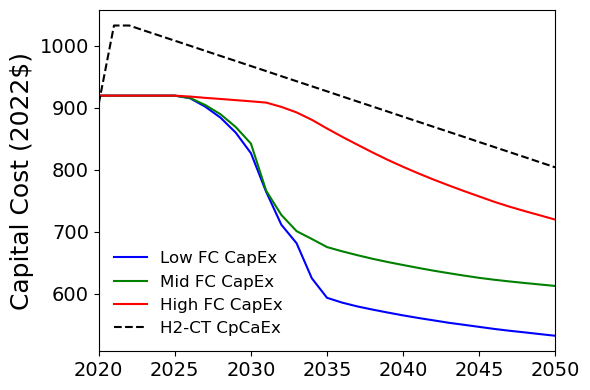

In [6]:
# Create the figure and axes for side-by-side plots
fig, axs = plt.subplots(figsize=(6,4))

# List of trend labels for each plot
labels = ['Low FC CapEx', 'Mid FC CapEx', 'High FC CapEx']
colors = ['blue', 'green', 'red'] 

# Plot fuel cell costs
for df, label, color in zip(fc_dfs, labels, colors):
    axs.plot(df['t'], df['capcost'], label=label, color=color)  # plot capcost against year

# Pot H2-CT Costs
axs.plot(h2ct_df['t'], h2ct_df['capcost'], label='H2-CT CpCaEx', color='Black', linestyle='--')

# Customize the plot
axs.set_xlim(2020,2050)
#axs.set_xlabel('Year', fontsize=12)
axs.set_ylabel('Capital Cost (2022$)', fontsize=18)
axs.tick_params(axis='both', labelsize=14) 

axs.legend(fontsize=12, loc='lower left',frameon=False)  # Add legend to differentiate the trends

# Adjust layout and show the plot
plt.tight_layout()


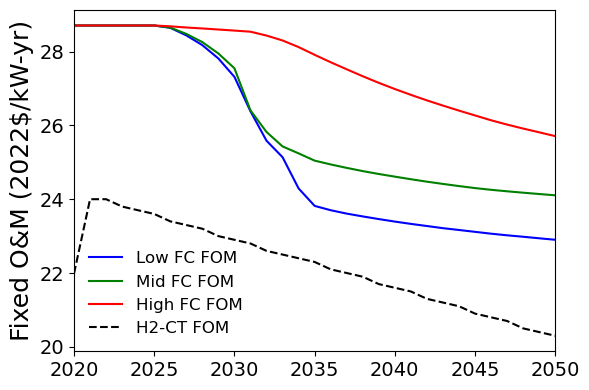

In [8]:
# Create the figure and axes for side-by-side plots
fig, axs = plt.subplots(figsize=(6,4))

# List of trend labels for each plot
labels = ['Low FC FOM', 'Mid FC FOM', 'High FC FOM']
colors = ['blue', 'green', 'red'] 

# Plot Fixed O&M Costs for fuel cells
for df, label, color in zip(fc_dfs, labels, colors):
    axs.plot(df['t'], df['fom'], label=label, color=color)  

# Plot Fixed O7M costs for H2-CTs
axs.plot(h2ct_df['t'], h2ct_df['fom'], label='H2-CT FOM',color='Black',linestyle='--')
# Customize plot
axs.set_xlim(2020,2050)
#axs.set_xlabel('Year', fontsize=12)
axs.set_ylabel('Fixed O&M (2022$/kW-yr)', fontsize=18)
axs.tick_params(axis='both', labelsize=14) 

# Create a single legend
axs.legend(fontsize=12, loc='lower left', frameon=False)


# Adjust layout and show the plot
plt.tight_layout()